Found 1937 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━

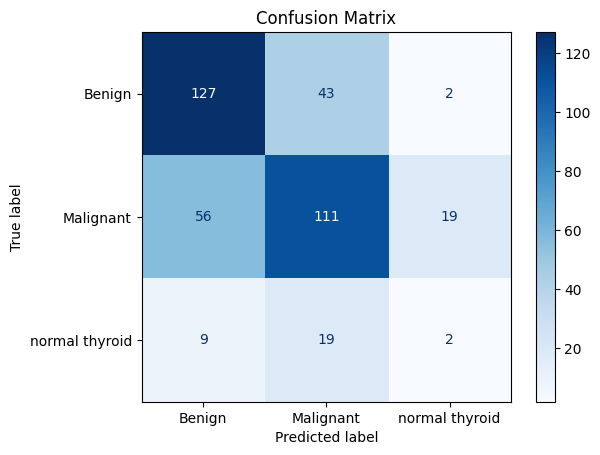

In [31]:
#VGG with KNN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Define image size and paths to dataset
image_size = (224, 224)

# Set up ImageDataGenerators for the dataset
datagen = ImageDataGenerator(rescale=1./255)

data_generator = datagen.flow_from_directory(
    '/kaggle/input/audit-dataset/dataset thyroid',  # Replace with your dataset path
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load the VGG19 model (without the top classification layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer to reduce dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of VGG19 to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Function to extract features from the generator using the VGG19 model
def extract_features(generator, model):
    features = []
    labels = []
    for batch_images, batch_labels in generator:
        batch_features = model.predict(batch_images)
        features.extend(batch_features)
        labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot to integer labels
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

# Extract features from the dataset
features, labels = extract_features(data_generator, model)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors

# Fit the KNN classifier on the training data
knn.fit(X_train, y_train)

# Get predictions and calculate accuracy for train, test, and validation sets
train_preds = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

test_preds = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

# For validation, we use the remaining part of the dataset
val_preds = knn.predict(X_test)  # Since we don't have a separate validation set, we're using the test set for this
val_accuracy = accuracy_score(y_test, val_preds)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Compute the confusion matrix for the test set
cm = confusion_matrix(y_test, test_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_generator.class_indices.keys())
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Found 1937 images belonging to 3 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

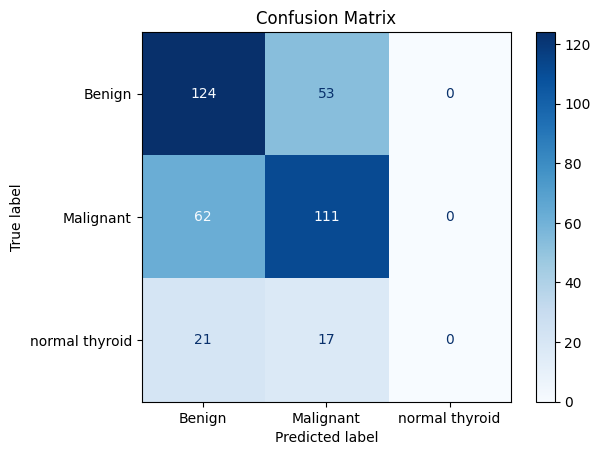

In [7]:
#VGG with SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Define image size and paths to dataset
image_size = (224, 224)

# Set up ImageDataGenerators for the dataset
datagen = ImageDataGenerator(rescale=1.0 / 255)

data_generator = datagen.flow_from_directory(
    '/kaggle/input/audit-dataset/dataset thyroid',  # Replace with your dataset path
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load the VGG19 model (without the top classification layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer to reduce dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of VGG19 to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Function to extract features from the generator using the VGG19 model
def extract_features(generator, model):
    features = []
    labels = []
    for batch_images, batch_labels in generator:
        batch_features = model.predict(batch_images)
        features.extend(batch_features)
        labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot to integer labels
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

# Extract features from the dataset
features, labels = extract_features(data_generator, model)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf', 'poly', etc.

# Fit the SVM classifier on the training data
svm.fit(X_train, y_train)

# Get predictions and calculate accuracy for train, test, and validation sets
train_preds = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

test_preds = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

# For validation, we use the remaining part of the dataset (same as the test set)
val_preds = svm.predict(X_test)  # Using test set for validation as we don't have a separate validation set
val_accuracy = accuracy_score(y_test, val_preds)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Compute the confusion matrix for the test set
cm = confusion_matrix(y_test, test_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_generator.class_indices.keys())
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Found 1551 images belonging to 3 classes.
Found 386 images belonging to 3 classes.
Found 386 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 

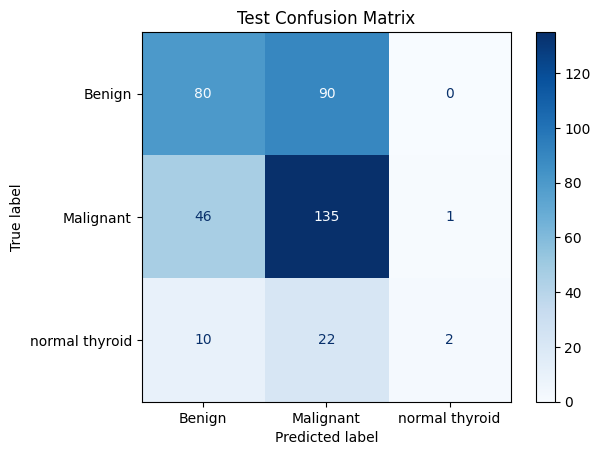

In [3]:
#ResNet50 with KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and paths to dataset
image_size = (224, 224)

# Set up ImageDataGenerators with validation_split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Set validation split to 20%

# Flow the data from the directory (for the whole dataset)
dataset_path = '/kaggle/input/audit-dataset/dataset thyroid'  # Replace with your dataset path

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'  # This is for the training data
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # This is for the validation data
)

# Flow the data from the directory for the test dataset
test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Or another dataset directory for testing
)

# Load the ResNet50 model (without the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer to reduce dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of ResNet50 to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Function to extract features from a generator using the ResNet50 model
def extract_features(generator, model):
    features = []
    labels = []
    for batch_images, batch_labels in generator:
        batch_features = model.predict(batch_images)
        features.extend(batch_features)
        labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot to integer labels
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

# Extract features from train, validation, and test data
train_features, train_labels = extract_features(train_generator, model)
val_features, val_labels = extract_features(val_generator, model)
test_features, test_labels = extract_features(test_generator, model)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors

# Fit the KNN classifier on the training data
knn.fit(train_features, train_labels)

# Get predictions and calculate accuracies for train, validation, and test sets
train_preds = knn.predict(train_features)
train_accuracy = accuracy_score(train_labels, train_preds)

val_preds = knn.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_preds)

# Test accuracy
test_preds = knn.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_preds)

# Print the accuracy
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Compute the confusion matrix for the test set
test_cm = confusion_matrix(test_labels, test_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=test_generator.class_indices.keys())
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix')
plt.show()


Found 1937 images belonging to 3 classes.
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
Train Accuracy: 0.6365
Validation Accuracy: 0.5841
Test Accuracy: 0.5914
Test Confusion Matrix:


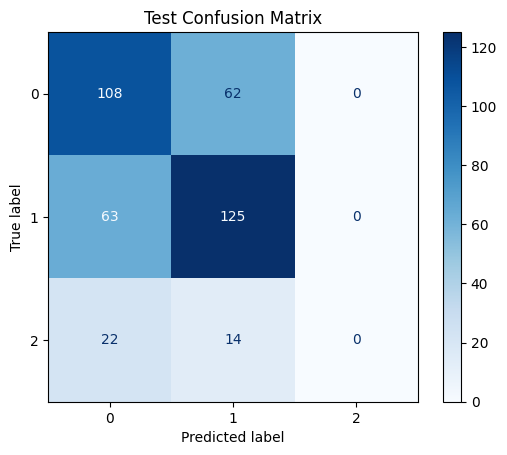

In [6]:
#ResNet50 with SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and paths to dataset
image_size = (224, 224)

# Set up ImageDataGenerators for overall dataset
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assume you have a generator for the entire dataset (train and test combined)
dataset_generator = datagen.flow_from_directory(
    '/kaggle/input/audit-dataset/dataset thyroid',  # Replace with your dataset path
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # Shuffle for randomness
)

# Load the entire dataset (images and labels)
images, labels = [], []

for batch_images, batch_labels in dataset_generator:
    images.append(batch_images)
    labels.append(batch_labels)
    if len(images) * batch_images.shape[0] >= dataset_generator.samples:
        break

# Convert to numpy arrays
images = np.vstack(images)
labels = np.vstack(labels)

# Split the dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Further split train data into train and validation sets (80:20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load the ResNet50 model (without the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer to reduce dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create the feature extraction model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of ResNet50 to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Function to extract features from the data using ResNet50 model
def extract_features(X, model):
    return model.predict(X)

# Extract features from train, validation, and test data
train_features = extract_features(X_train, model)
val_features = extract_features(X_val, model)
test_features = extract_features(X_test, model)

# Initialize SVM classifier (Support Vector Classifier)
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the SVM classifier on the training data
svm_classifier.fit(train_features, np.argmax(y_train, axis=1))

# Get predictions for train, validation, and test data
train_preds = svm_classifier.predict(train_features)
val_preds = svm_classifier.predict(val_features)
test_preds = svm_classifier.predict(test_features)

# Calculate accuracy for train, validation, and test
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_preds)
val_accuracy = accuracy_score(np.argmax(y_val, axis=1), val_preds)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_preds)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for the Test data
test_cm = confusion_matrix(np.argmax(y_test, axis=1), test_preds)
print("Test Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot(cmap='Blues')
plt.title("Test Confusion Matrix")
plt.show()
